In [90]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from ydata_profiling import ProfileReport

In [102]:
# Define presets for data visualization
def presets():
    plt.rc('figure', autolayout = True)

    plt.rc('axes', 
        labelsize = 'large',
        labelweight = 'bold',
        titlesize = 14,
        titleweight = 'bold',
        titlepad = 10       
    )

    %config InlineBackend.figure_format = 'retina'
    pd.options.display.max_rows = 10
    sns.set_style('whitegrid')
    # Set preset for darkmode for matplotlib and seaborn visualizations
    # plt.style.use('dark_background')

    warnings.filterwarnings(action = 'ignore', category = UserWarning)
    return 

presets()



### Data Loading and Preprocessing
---

In [103]:
# Load the data
url = "path_to_your_data.csv"  # Replace with the actual path to your CSV file
# data = pd.read_csv(url)
data = pd.read_csv("data.csv")
df = data.copy()

In [104]:
df.shape

(48895, 16)

In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [106]:
# Check for missing values and show the number of missing values by column
def check_missing_value():
    # show number of missing values as a dataframe by column
    missing_values = df.isnull().sum()
    missing_values = missing_values[missing_values > 0]
    missing_values = missing_values.sort_values(ascending=False)
    missing_values = missing_values.reset_index()
    missing_values.columns = ["Feature", "Missing Values"]
    return missing_values


check_missing_value()

,Feature,Missing Values
0,last_review,10052
1,reviews_per_month,10052
2,host_name,21
3,name,16


In [107]:
# Check for duplicates and show the count of duplicates
def check_duplicates():
    # Count the number of duplicate rows
    duplicate_count = df.duplicated().sum()
    
    # Create a DataFrame to show the count of duplicates
    duplicates_df = pd.DataFrame({"Feature": ["Duplicates"], "Count": [duplicate_count]})
    
    return duplicates_df

# Call the function to check for duplicates
check_duplicates()

,Feature,Count
0,Duplicates,0


In [108]:
# Handle missing values
df = df.assign(reviews_per_month=df["reviews_per_month"].fillna(0))
df = df.dropna(subset=["last_review"])

df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48782,36425863,Lovely Privet Bedroom with Privet Restroom,83554966,Rusaa,Manhattan,Upper East Side,40.78099,-73.95366,Private room,129,1,1,2019-07-07,1.00,1,147
48790,36427429,No.2 with queen size bed,257683179,H Ai,Queens,Flushing,40.75104,-73.81459,Private room,45,1,1,2019-07-07,1.00,6,339
48799,36438336,Seas The Moment,211644523,Ben,Staten Island,Great Kills,40.54179,-74.14275,Private room,235,1,1,2019-07-07,1.00,1,87
48805,36442252,1B-1B apartment near by Metro,273841667,Blaine,Bronx,Mott Haven,40.80787,-73.92400,Entire home/apt,100,1,2,2019-07-07,2.00,1,40


In [109]:
# Convert data types
df["last_review"] = pd.to_datetime(df["last_review"])

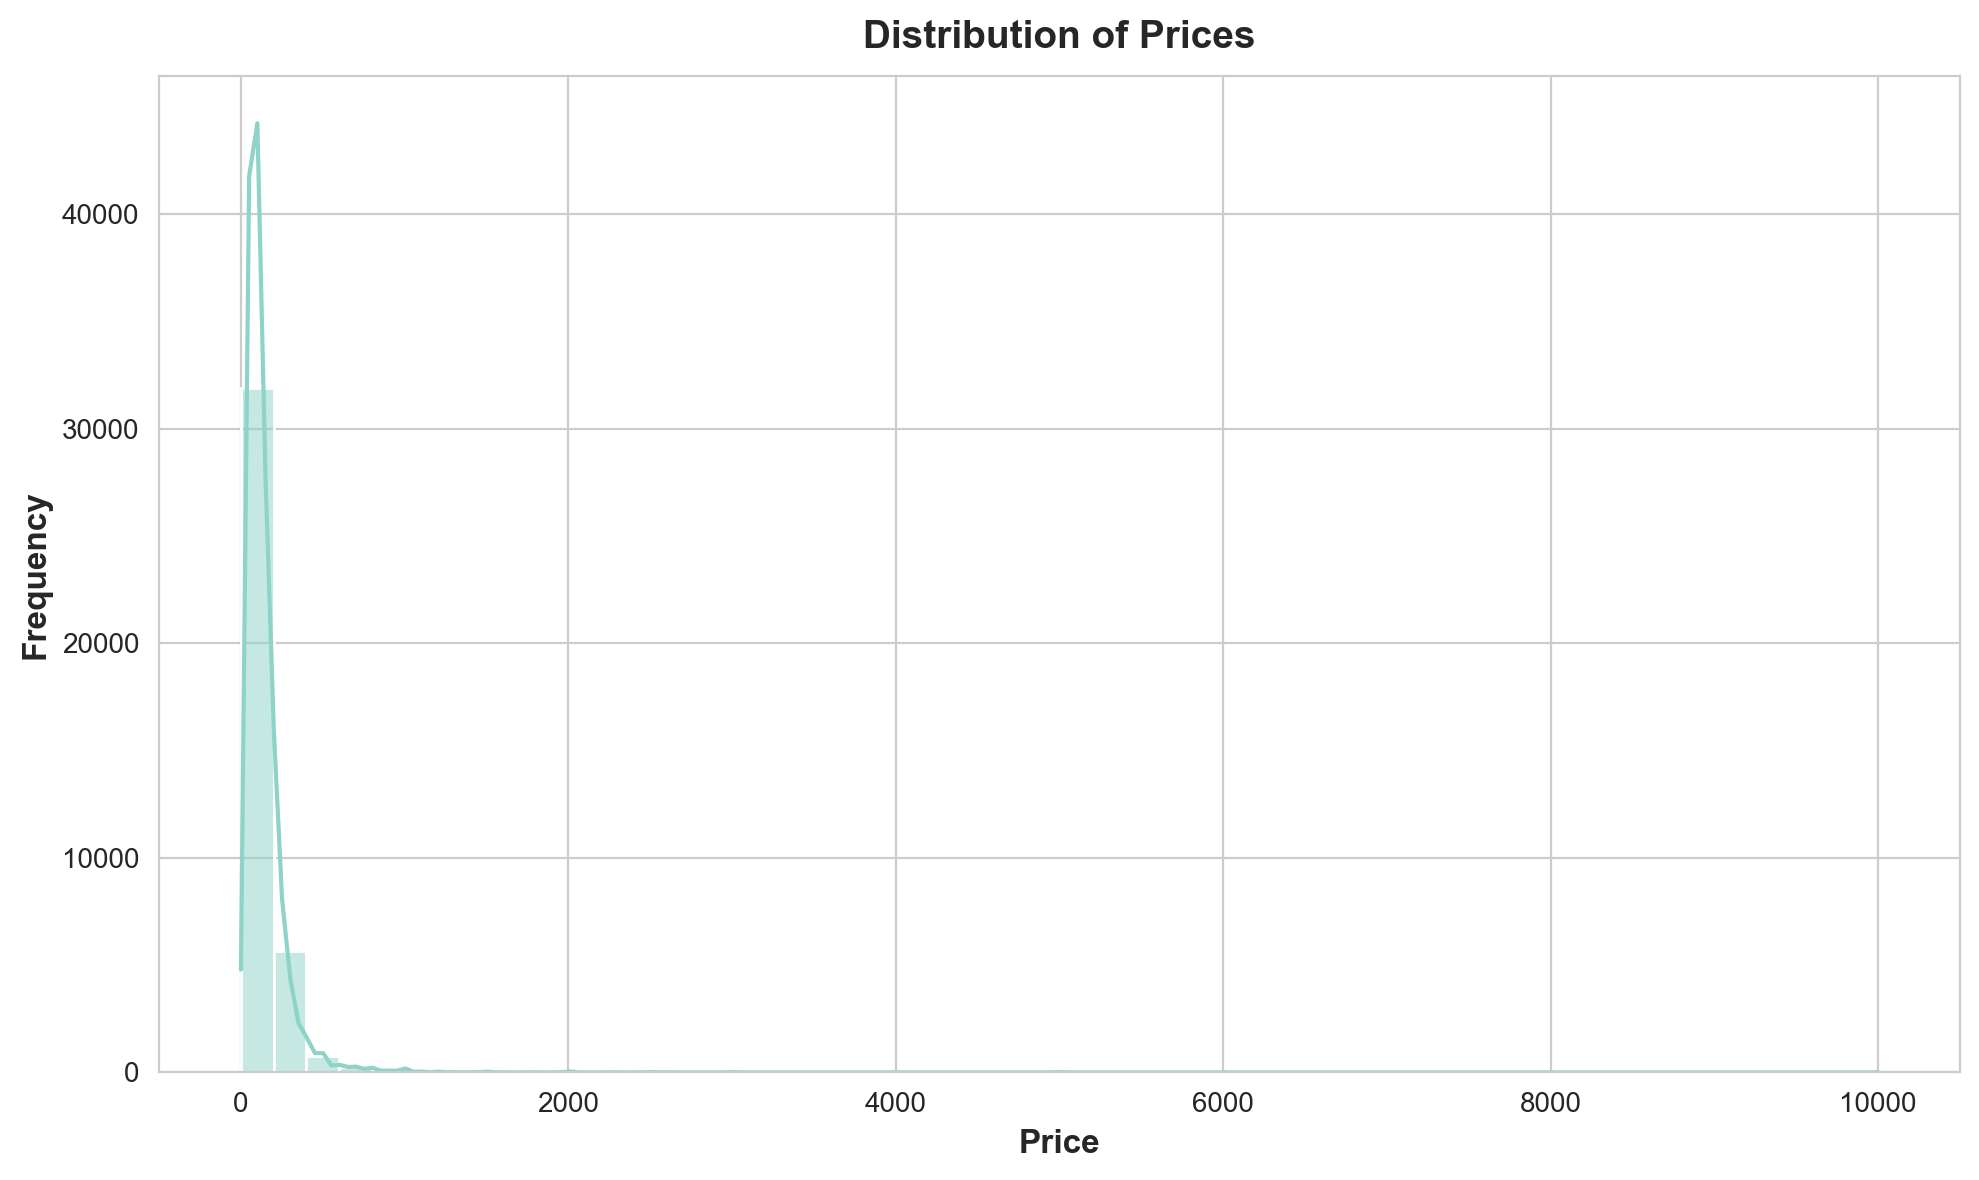

In [110]:

# Step 2: Exploratory df Analysis (EDA)
# Visualize the distribution of prices
plt.figure(figsize=(10, 6))
sns.histplot(df["price"], bins=50, kde=True)
plt.title("Distribution of Prices")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()

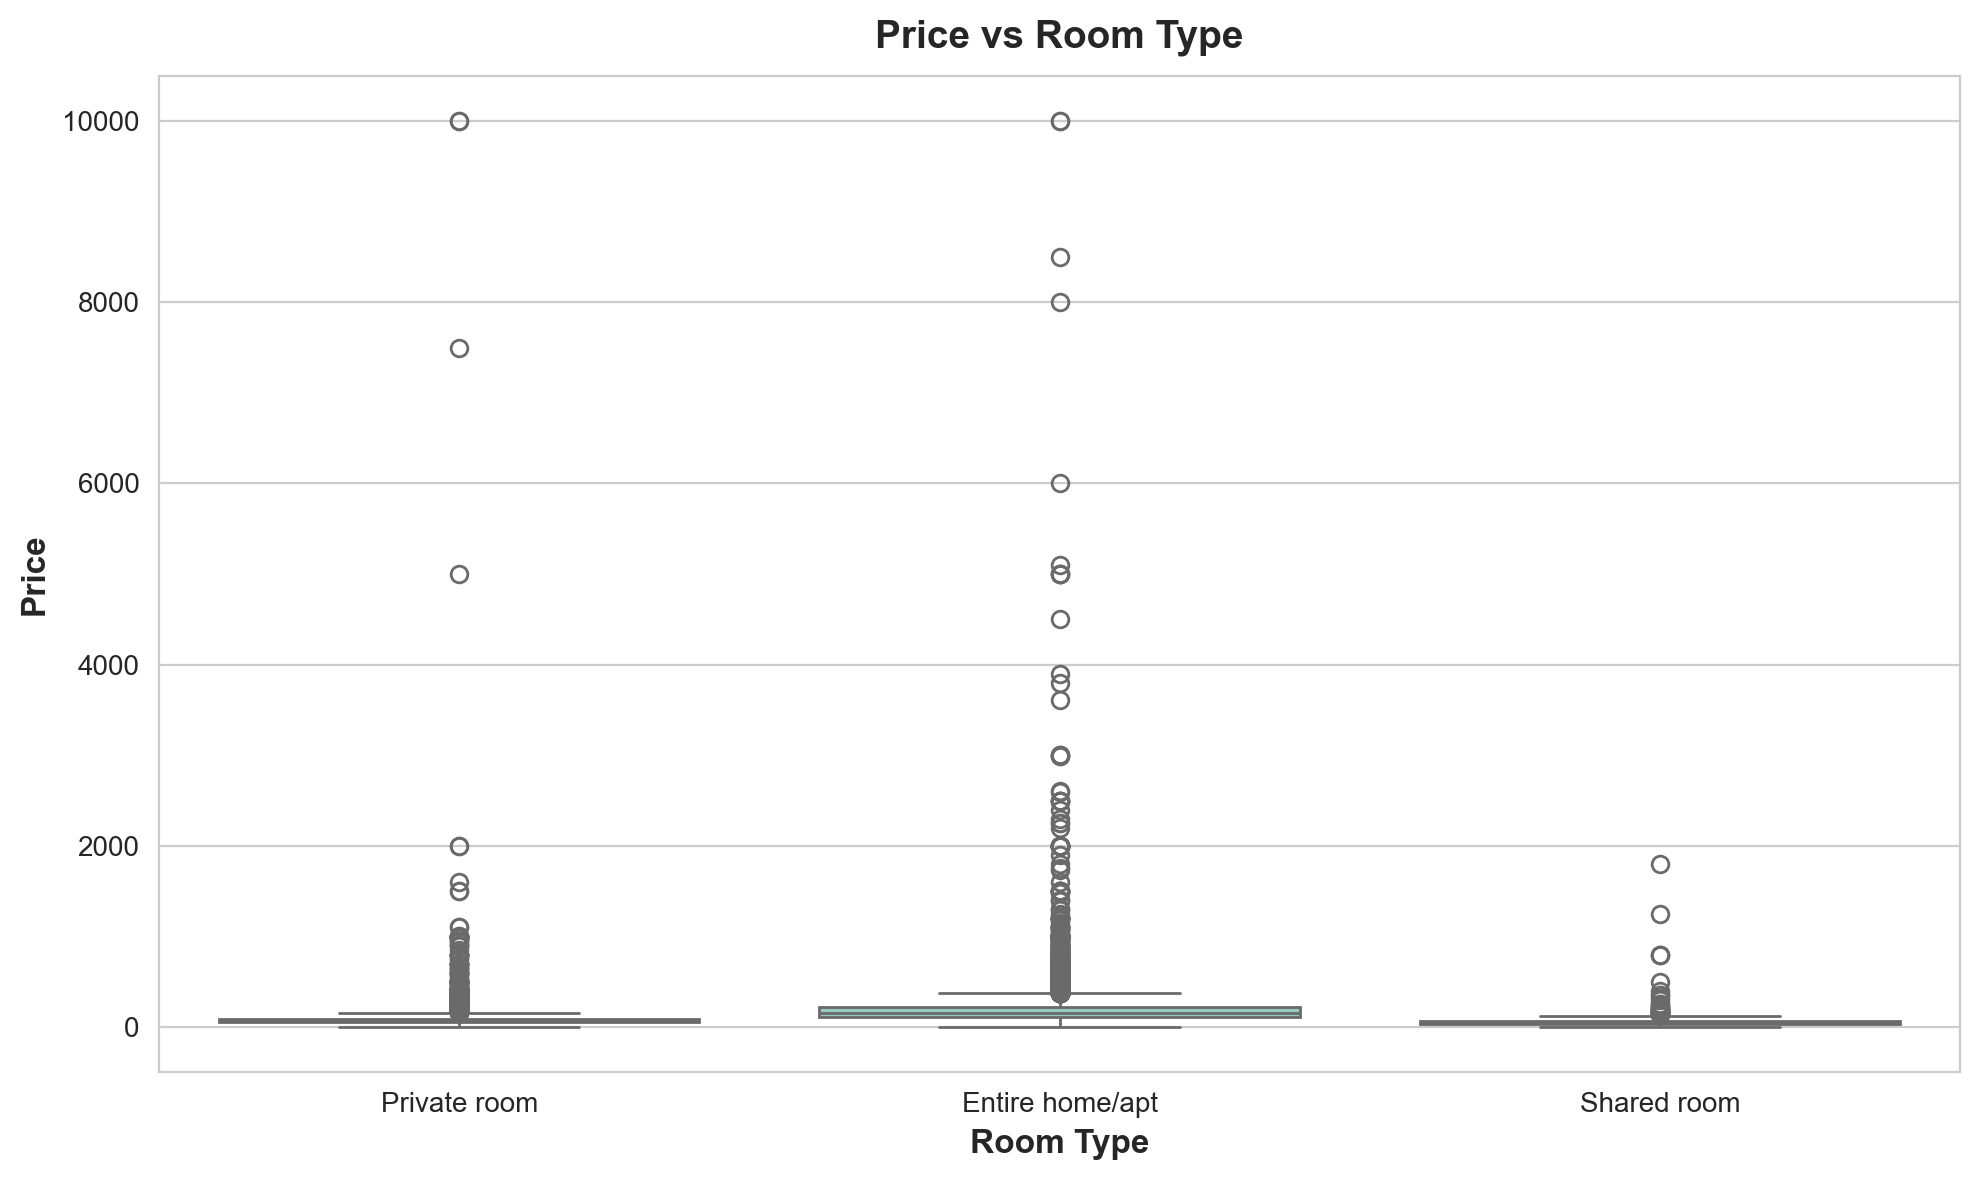

In [111]:
# Analyze the relationship between price and room type
plt.figure(figsize=(10, 6))
sns.boxplot(x="room_type", y="price",data=df)
plt.title("Price vs Room Type")
plt.xlabel("Room Type")
plt.ylabel("Price")
plt.show()


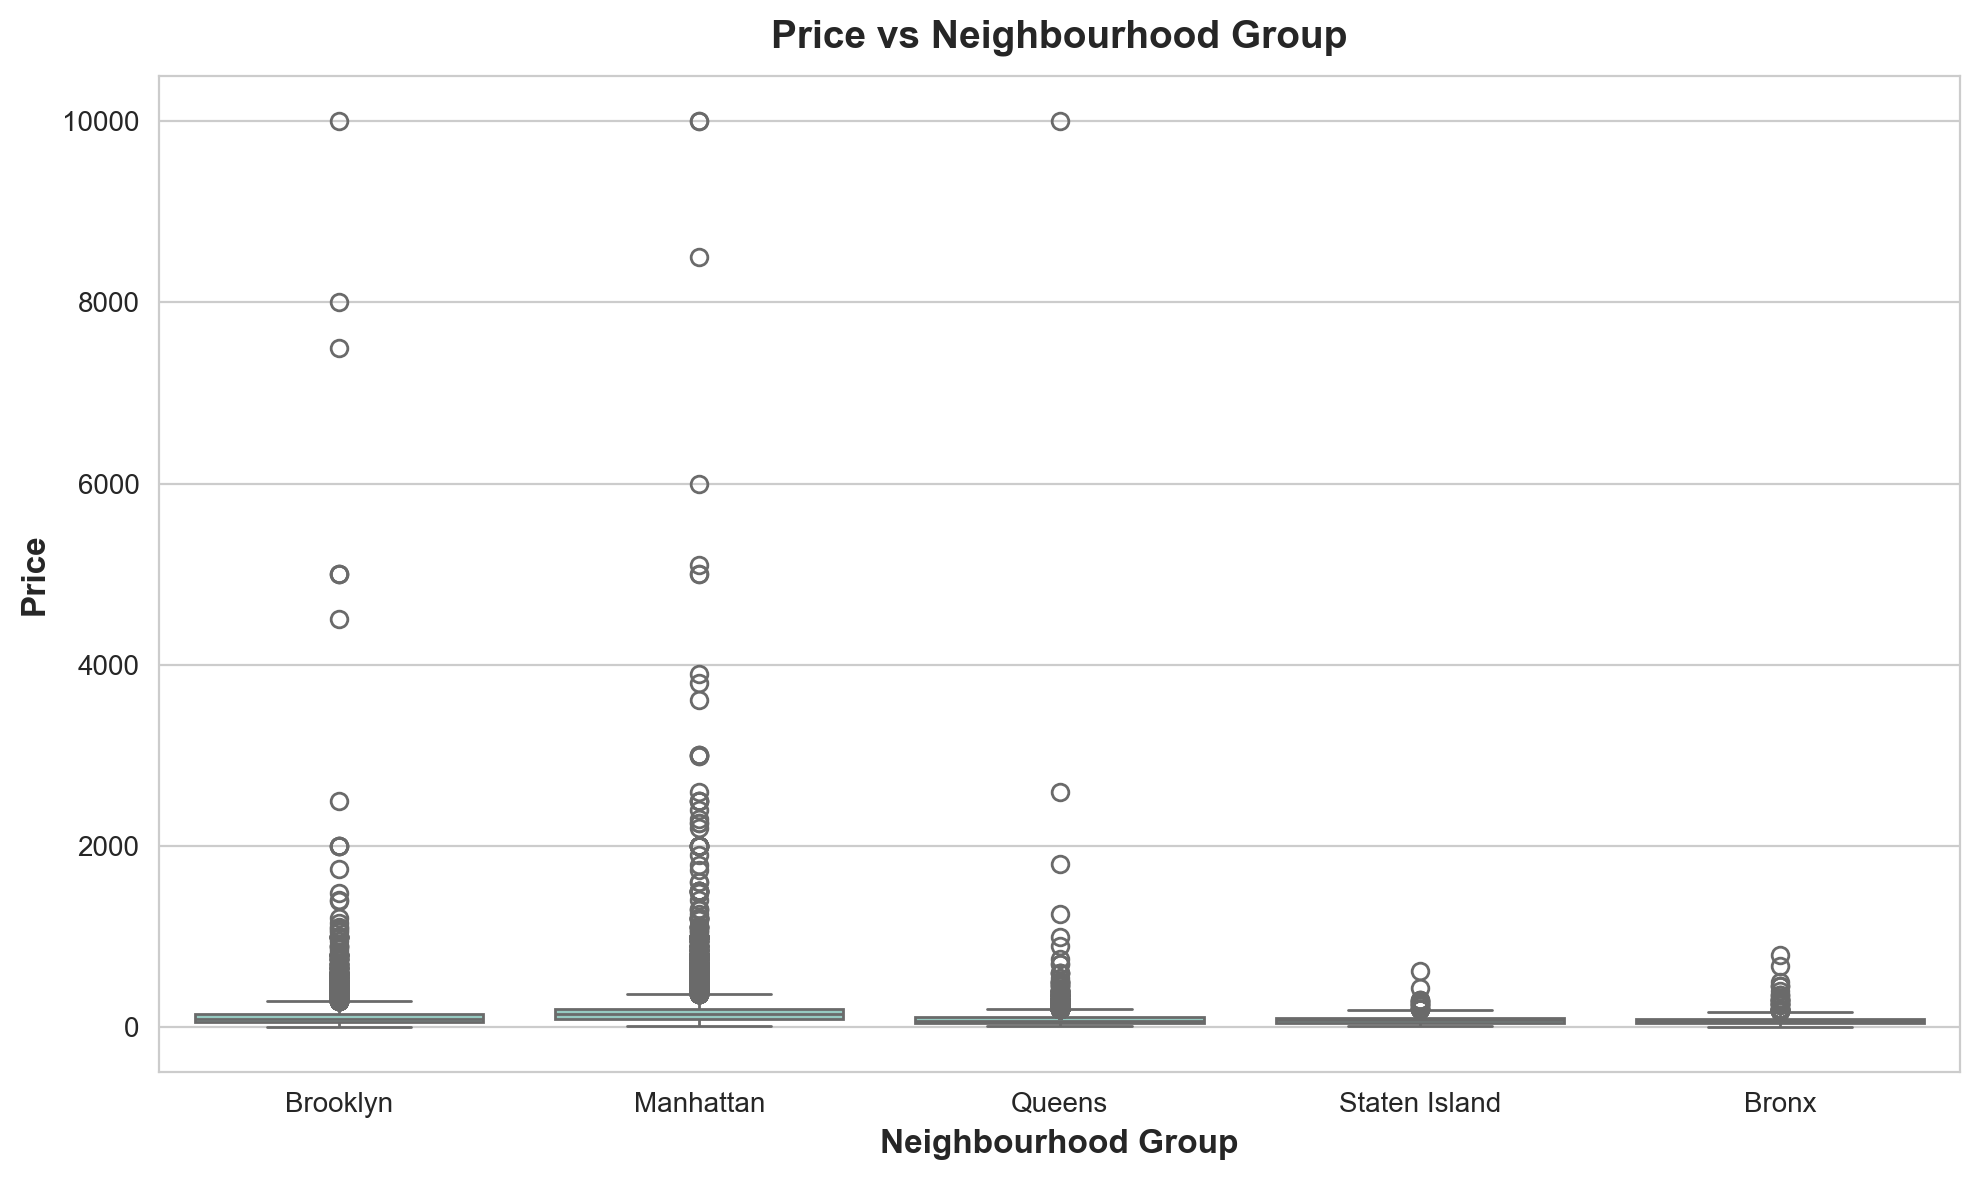

In [112]:
# Analyze relationship between price and room type
plt.figure(figsize=(10, 6))
sns.boxplot(x="neighbourhood_group", y="price", data=df)
plt.title("Price vs Neighbourhood Group")
plt.xlabel("Neighbourhood Group")
plt.ylabel("Price")
plt.show()


In [113]:
# Summarize key statistics
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
count,3.884300e+04,3.884300e+04,38843.000000,38843.000000,38843.000000,38843.000000,38843.000000,38843,38843.000000,38843.000000,38843.000000
mean,1.809646e+07,6.423915e+07,40.728134,-73.951148,142.317947,5.868059,29.297557,2018-10-04 01:47:23.910099712,1.373221,5.164457,114.882888
min,2.539000e+03,2.438000e+03,40.506410,-74.244420,0.000000,1.000000,1.000000,2011-03-28 00:00:00,0.010000,1.000000,0.000000
25%,8.720027e+06,7.033824e+06,40.688640,-73.982470,69.000000,1.000000,3.000000,2018-07-08 00:00:00,0.190000,1.000000,0.000000
50%,1.887146e+07,2.837193e+07,40.721710,-73.954800,101.000000,2.000000,9.000000,2019-05-19 00:00:00,0.720000,1.000000,55.000000
75%,2.755482e+07,1.018465e+08,40.762990,-73.935020,170.000000,4.000000,33.000000,2019-06-23 00:00:00,2.020000,2.000000,229.000000
max,3.645581e+07,2.738417e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,2019-07-08 00:00:00,58.500000,327.000000,365.000000
std,1.069370e+07,7.588847e+07,0.054990,0.046695,196.945624,17.384784,48.186374,NaN,1.680442,26.295665,129.543636


### Model Building with Random Forests and Linear Regression
---

In [57]:

# Prepare the df for modeling
features = [
    "latitude",
    "longitude",
    "minimum_nights",
    "number_of_reviews",
    "reviews_per_month",
    "calculated_host_listings_count",
    "availability_365",
]
X = df[features]
y = df["price"]

In [75]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Split the df into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Model Dictionary
model_dictionary = {
    "Linear Regression": LinearRegression(),
    "Random Forest Regressor": RandomForestRegressor(),
}

# Initialize Evaluation Dictionary
eval_dictionary = {}

# Train and evaluate the models
for model_name, model in model_dictionary.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    eval_dictionary[model_name] = {
        "mae": mean_absolute_error(y_test, y_pred),
        "mse": mean_squared_error(y_test, y_pred),
        "r2": r2_score(y_test, y_pred),
    }

# Store results in a dataframe with models as index and metrics as columns
eval_df = pd.DataFrame(eval_dictionary).T

eval_df.round(3)

,mae,mse,r2
Linear Regression,75.573,27373.307,0.049
Random Forest Regressor,67.233,25922.512,0.099


After using features 
```
"latitude",
    "longitude",
    "minimum_nights",
    "number_of_reviews",
    "reviews_per_month",
    "calculated_host_listings_count",
    "availability_365",
    ```
to predict prices of the types of dataset, we obtain the results seen above where Random Forests is performing best with a mean absolute error of 67.233

In [116]:
import tensorflow as tf

# Check if TensorFlow can detect the GPU
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    print("GPUs detected:")
    for gpu in gpus:
        print(gpu)
else:
    print("No GPUs detected.")

# Optionally, set memory growth to avoid TensorFlow from allocating all GPU memory
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        logical_gpus = tf.config.experimental.list_logical_devices('GPU')
        print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
    except RuntimeError as e:
        # Memory growth must be set before GPUs have been initialized
        print(e)

No GPUs detected.


In [114]:
# Build a neural network to predict the price based
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# Step 1: Build the Neural Network
def build_model():
    model = Sequential([
        Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
        Dense(32, activation='relu'),
        Dense(1)
    ])
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')
    return model

# Step 2: Train the Neural Network
model = build_model()
history = model.fit(X_train, y_train, epochs=100, validation_split=0.2, verbose=0)

# Step 3: Evaluate the Neural Network
y_pred_nn = model.predict(X_test)
mse_nn = mean_squared_error(y_test, y_pred_nn)
mae_nn = mean_absolute_error(y_test, y_pred_nn)
r2_nn = r2_score(y_test, y_pred_nn)

# Add Neural Network results to the evaluation dictionary
eval_dictionary["Neural Network"] = {
    "mae": mae_nn,
    "mse": mse_nn,
    "r2": r2_nn,
}

# Store results in a dataframe with models as index and metrics as columns
eval_df = pd.DataFrame(eval_dictionary).T

eval_df

KeyboardInterrupt: 